<a href="https://colab.research.google.com/github/xoyeon/hongong-mldl/blob/main/04_2_%7C_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 점진적인 학습
점진적 학습 : 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식
- 확률적 경사 하강법(Stochastic Gradient Descent)

* **확률적 경사 하강법** : 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것
* 에포크(epoch) : 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정
* 미니배치 경사 하강법(minibatch gradient descent) : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
* 배치 경사 하강법(batch gradient descent) : 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식


* **손실 함수(loss function)** : 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준 / 샘플 하나에 대한 손실을 정의
    * 비용 함수(cost function) : 모든 샘플에 대한 손실 함수의 합


* **로지스틱 손실 함수(logistic loss function)** 
 = 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)
 - 크로스엔트로피 손실 함수(cross-entropy loss function) : 다중 분류에서 사용하는 손실 함수

  > 회귀에서는 '평균 절댓값 오차' 또는 '평균 제곱 오차(MSE)'를 사용

# SGDClassifier

In [1]:
# fish_csv_data 파일에서 판다스 데이터프레임 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
# Species 열을 제외한 나머지 5개는 입력 데이터, Species 열은 타깃 데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [4]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
# 확률적 경사 하강법을 제공하는 분류용 클래스 불러오기
from sklearn.linear_model import SGDClassifier

In [6]:
# SGDClassifier의 객체를 만들 때 2개의 매개변수 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)  ## loss는 손실 함수의 종류 지정('log' 로지스틱 손실 함수), max_iter는 수행할 에포크 횟수 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [7]:
# SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련
sc.partial_fit(train_scaled, train_target)  ## partial_fit()은 호출할 때마다 1에포크씩 이어서 훈련 가능
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


# 에포크와 과대/과소적합
조기 종료(early stopping) : 과대적합이 시작하기 전에 훈련을 멈추는 것

In [8]:
# 준비한 데이터셋으로 과대/과소적합 그래프 만들기
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [9]:
# 300번의 에포크 동안 훈련 반복하여 진행
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

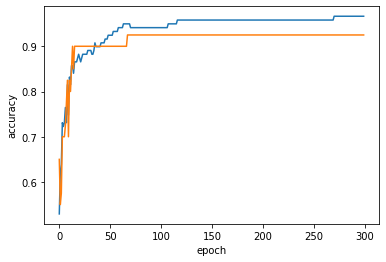

In [10]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그릭
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
## 백 번째 에포트 이후 훈련 세트와 테스트 세트의 점수차가 생김

In [11]:
# SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier의 loss 매개변수를 알아보자
- loss 매개변수의 기본값은 'hinge'
    * 힌지 손실(hinge loss)
    * 서포트 벡터 머신(support vector machine)

In [13]:
# 힌지 손실을 사용해 같은 반복 횟수 동안 모델 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
